In [50]:
import numpy as np
import networkx  as nx
import matplotlib.pyplot as plt
import pandas as pd
import powerlaw
from time import process_time


In [274]:
# Open requeriments file
df = pd.read_csv("../data/requirements.csv")
df

,package,requirement,package_name,package_version
0,02exercicio-1.0.0,NaN,02exercicio,1.0.0
1,0x10c-asm-0.0.2,NaN,0x10c-asm,0.0.2
2,115wangpan-0.7.6,beautifulsoup4,115wangpan,0.7.6
3,115wangpan-0.7.6,homura,115wangpan,0.7.6
4,115wangpan-0.7.6,humanize,115wangpan,0.7.6
...,...,...,...,...
110099,zzr-1.0.0,NaN,zzr,1.0.0
110100,zzz-0.0.2,NaN,zzz,0.0.2
110101,zzzeeksphinx-1.0.18,mako,zzzeeksphinx,1.0.18
110102,zzzeeksphinx-1.0.18,pyscss,zzzeeksphinx,1.0.18


In [275]:
# replace 0 where "NaN" data
df["requirement"].fillna(0,inplace=True)
df["package_name"].fillna(0,inplace=True)

In [276]:
df

,package,requirement,package_name,package_version
0,02exercicio-1.0.0,0,02exercicio,1.0.0
1,0x10c-asm-0.0.2,0,0x10c-asm,0.0.2
2,115wangpan-0.7.6,beautifulsoup4,115wangpan,0.7.6
3,115wangpan-0.7.6,homura,115wangpan,0.7.6
4,115wangpan-0.7.6,humanize,115wangpan,0.7.6
...,...,...,...,...
110099,zzr-1.0.0,0,zzr,1.0.0
110100,zzz-0.0.2,0,zzz,0.0.2
110101,zzzeeksphinx-1.0.18,mako,zzzeeksphinx,1.0.18
110102,zzzeeksphinx-1.0.18,pyscss,zzzeeksphinx,1.0.18


In [281]:
# Remove all elements without requirement
requi_0 = [i for i in range(len(df)) if df["requirement"].values[i]==0]
df = df.drop(requi_0)

In [283]:
df

,package,requirement,package_name,package_version
2,115wangpan-0.7.6,beautifulsoup4,115wangpan,0.7.6
3,115wangpan-0.7.6,homura,115wangpan,0.7.6
4,115wangpan-0.7.6,humanize,115wangpan,0.7.6
5,115wangpan-0.7.6,pycurl,115wangpan,0.7.6
6,115wangpan-0.7.6,pysocks,115wangpan,0.7.6
...,...,...,...,...
110094,zymbit-trequests-0.9.5,requests,zymbit-trequests,0.9.5
110095,zymbit-trequests-0.9.5,tornado,zymbit-trequests,0.9.5
110096,zymbit-trequests-0.9.5,tornalet,zymbit-trequests,0.9.5
110101,zzzeeksphinx-1.0.18,mako,zzzeeksphinx,1.0.18


In [285]:
# Separate sites with package_name and without package_name
list_r_1 = []
list_r_2 = []
for i in range(len(df)):
    if(df["package_name"].values[i]==0):
        list_r_1.append(i)
    else:
        list_r_2.append(i)

In [291]:
# Create unique values with nodes
list_1 = [df["package_name"].values[i] for i in list_r_2]
list_2 = [df["package"].values[i] for i in list_r_1]
list_3 = [df["requirement"].values[i] for i in range(len(df))]
list_tot = np.unique(list_1+list_2+list_3)

In [295]:
df_data_index = [str('{:0{width}d}'.format(i, width=5)) for i in range(0,len(list_tot))]
df_data_node = [i for i in list_tot]
data1 = {"index":df_data_index,"package":df_data_node}
df_nodes = pd.DataFrame(data=data1)
df_nodes.to_csv("../data/nodes.csv",index=False,mode="w")

In [304]:
df_nodes

,index,package
0,00000,-
1,00001,-allow-all-external
2,00002,-allow-external
3,00003,-allow-unverified
4,00004,-always-unzip
...,...,...
26389,26389,zygote
26390,26390,zymbit
26391,26391,zymbit-connect
26392,26392,zymbit-trequests


In [303]:
edge_pack = []
edge_requi = df["requirement"]

for i in range(len(df)):
    if(df["package_name"].values[i]==0):
        edge_pack.append(df["package"].values[i])
    else:
        edge_pack.append(df["package_name"].values[i])
data2 = {"package":edge_pack,"requirement":edge_requi}
df_edge = pd.DataFrame(data=data2)
df_edge.to_csv("../data/edges.csv",index=False,mode="w")

In [309]:
N = len(df_nodes)
for i in range(N):
    t1_start = process_time() 
    index_element = df_nodes["index"].iloc[(df_nodes['package'] == df_nodes.iloc[i,1]).idxmax()]
    df_edge.replace(to_replace=df_nodes.iloc[i,1],value=index_element,inplace=True)
    t1_stop = process_time()
    print(f"i={i},rest={N-i}, time_1_process = {t1_stop - t1_start}")

i=0,rest=26394, time_1_process = 0.02075567100018816
i=1,rest=26393, time_1_process = 0.017539092000106393
i=2,rest=26392, time_1_process = 0.0155148360001931
i=3,rest=26391, time_1_process = 0.018603920000032304
i=4,rest=26390, time_1_process = 0.013924905000067156
i=5,rest=26389, time_1_process = 0.007800528999950984
i=6,rest=26388, time_1_process = 0.011066624000022784
i=7,rest=26387, time_1_process = 0.00992636599994512
i=8,rest=26386, time_1_process = 0.009806872000126532
i=9,rest=26385, time_1_process = 0.011179456000036225
i=10,rest=26384, time_1_process = 0.008249702000057368
i=11,rest=26383, time_1_process = 0.01102259200001754
i=12,rest=26382, time_1_process = 0.011957535999954416
i=13,rest=26381, time_1_process = 0.00810335699998177
i=14,rest=26380, time_1_process = 0.011459350999984963
i=15,rest=26379, time_1_process = 0.007811629999878278
i=16,rest=26378, time_1_process = 0.011274323999941771
i=17,rest=26377, time_1_process = 0.011935705000041708
i=18,rest=26376, time_1_pr

In [311]:
df_edge.to_csv("../data/edges_1.csv",index=False,mode="w")

In [ ]:
N = len(df_all)
for i in range(N):
    t1_start = process_time() 
    index_element = str((df_all['requirement'] == df_all.iloc[i,1]).idxmax())
    df_r.replace(to_replace=df_all.iloc[i,1],value=index_element,inplace=True)
    t1_stop = process_time()
    print(f"i={i},rest={N-i}, time_1_process = {t1_stop - t1_start}")

In [89]:
df_r

,package,requirement,package_name,package_version
0,36331,beautifulsoup4,115wangpan,0.7.6
1,36331,homura,115wangpan,0.7.6
2,36331,humanize,115wangpan,0.7.6
3,36331,pycurl,115wangpan,0.7.6
4,36331,pysocks,115wangpan,0.7.6
...,...,...,...,...
73768,56971,requests,zymbit-trequests,0.9.5
73769,56971,tornado,zymbit-trequests,0.9.5
73770,56971,tornalet,zymbit-trequests,0.9.5
73771,56972,mako,zzzeeksphinx,1.0.18


In [3]:
#G = nx.from_pandas_edgelist(df,"# source", " target",create_using=nx.Graph)

In [4]:
#degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

In [67]:
#node_with_highest_degree = max(G.nodes(), key=G.degree)
#highest_degree = G.degree(node_with_highest_degree)
#print("Node with highest degree:", node_with_highest_degree)
#print("Degree:", highest_degree)

Node with highest degree: 1
Degree: 35946


In [10]:
def distribution(degree):
    hist, bins_edge = np.histogram(degree, bins=np.arange(0.5,10**4+1.5,1), density=True)
    
    P = hist*np.diff(bins_edge)             # distribution = density*deltaK
    K = bins_edge[:-1]+bins_edge[:1]
    index_remove = []                       # load index with distribution zero
    
    for idk,elements in enumerate(P):
        if(elements==0):
            index_remove.append(idk) 
    # Removing elements in k_mean and distribution with distribution = 0 (empty box)
    p_real = np.delete(P,index_remove)      
    k_real = np.delete(K,index_remove)
    return k_real,p_real

In [11]:
#k, pk = distribution(degree_sequence)

In [29]:
#results = powerlaw.Fit(degree_sequence)
#fit = powerlaw.Fit(degree_sequence, xmax=1000)
#print(fit.xmax)
#print(fit.fixed_xmax)
#R, p = results.distribution_compare('power_law', 'lognormal')

Calculating best minimal value for power law fit
1000.0rogress: 99%
True


Calculating best minimal value for power law fit


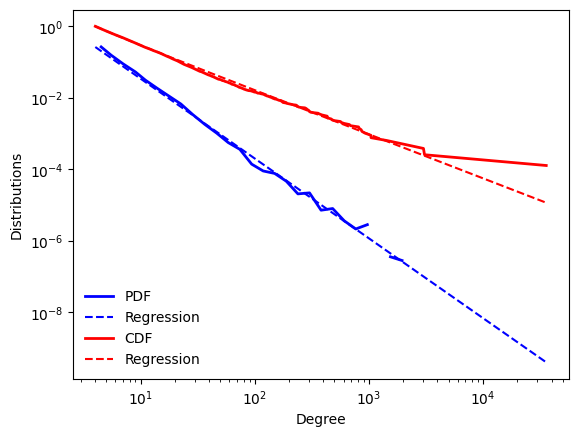

In [54]:
'''
data = degree_sequence

fit = powerlaw.Fit(data, discrete=True)
####
figCCDF = fit.plot_pdf(color='b', linewidth=2,label="PDF")
fit.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF,label="Regression")
fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF,label="CDF")
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF,label="Regression")

handles, labels = figCCDF.get_legend_handles_labels()
leg = figCCDF.legend(handles, labels, loc=3)
leg.draw_frame(False)
####
figCCDF.set_ylabel(u"Distributions")
figCCDF.set_xlabel(r"Degree")
filename = '../results/Distributions'
plt.savefig(filename+'.pdf', bbox_inches='tight')
#savefig(figname+'.eps', bbox_inches='tight')
'''

In [46]:
fit.alpha
fit.xmin

4.0

In [63]:
fit.alpha

2.231241794850208

In [55]:
def real_pl(xmin,xmax,a, x):
    A = (xmin**(-a+1)-xmax**(-a+1))/a
    y = []
    for i in range(len(x)):
        y.append(A*x[i]**(-a))
    return y

In [61]:
y = real_pl(fit.xmin,max(k),fit.alpha,k)

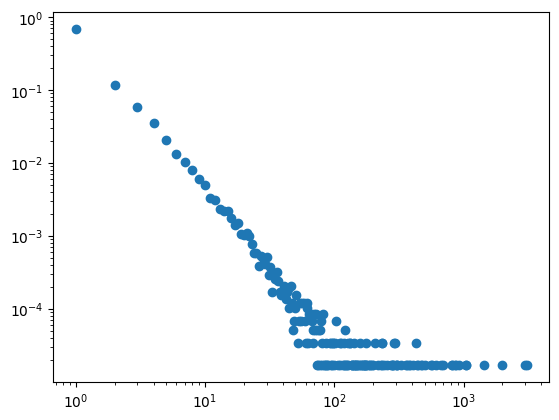

In [68]:
plt.plot(k,pk,'o')
#plt.plot(k,y)
plt.xscale("log")
plt.yscale("log")
plt.show()